In [17]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Some defaults...
matplotlib.rcParams['figure.figsize'] = (12, 8)
%load_ext autoreload
%autoreload 2

In [8]:
import os

cwd = os.getcwd()

ratings_df = pd.read_csv(cwd + '/data/ratings.csv')
movies_df = pd.read_csv(cwd + '/data/movies.csv')
tags_df = pd.read_csv(cwd + '/data/tags.csv')

# Data quality report

In [16]:
ratings_df.sample(10)
# print(ratings_df.sample(10).to_latex())


,userId,movieId,rating,timestamp
16148190,165052,4223,3.00,1119065240
24410143,249609,1333,4.00,1413137013
5957231,61195,316,5.00,829231990
5795855,59667,88744,2.00,1500437026
26865443,274332,6162,1.00,1049739699
24528493,250791,1483,4.50,1514487291
766251,7766,153,3.00,986830837
2403999,24756,3039,4.00,1517019791
26093103,266526,4902,4.50,1247931551
27657913,282203,2970,4.50,1424534140


In [14]:
ratings_df.nunique()

userId         283228
movieId         53889
rating             10
timestamp    22131556
dtype: int64

In [25]:
# print(tags_df.sample(10).to_latex())
tags_df.sample(10)

,userId,movieId,tag,timestamp
484118,80682,193,so bad it's good,1273377587
446365,73406,170000,horse,1527134297
776760,169075,5093,Arnold Schwarzenegger,1467894963
516501,93984,4903,Oscar Nominee: Best Picture,1526055167
613644,120116,135127,tunnel,1434664392
104757,31596,45668,sweet,1171532743
1069758,271131,74545,politics,1364818495
460448,73406,184425,hunting trip,1526616925
558584,103013,68974,not on DVD,1245629623
679565,141505,135861,jokes,1450540600


In [22]:
tags_df.nunique()

userId        19325
movieId       45981
tag           74714
timestamp    911869
dtype: int64

In [31]:
# print(movies_df.sample(10).to_latex())
movies_df.sample(10)

,movieId,title,genres
49792,174931,The Milkmaid (1953),(no genres listed)
781,794,Midnight Dancers (Sibak) (1994),Comedy|Drama
19452,95967,Marriage Retreat (2011),Comedy|Drama
39481,152055,Pandemic (2016),Action
54751,185865,Two Half-Times in Hell (1961),Drama|War
12356,56782,There Will Be Blood (2007),Drama|Western
39799,152774,Captain Fury (1939),Action|Adventure
49879,175169,Rumble: The Indians Who Rocked the World (2017),Documentary
47783,170689,The Kids Are Alright (1979),Documentary
23711,110899,Rage (2014),Action|Crime|Thriller


In [32]:
movies_df.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


## Detailled statistics on ratings

In [5]:
# Source : https://www.pschwan.de/how-to/setting-up-data-quality-reports-with-pandas-in-no-time

count_col = pd.DataFrame(
    ratings_df.count(),
    columns=['Occurrences']
)

data_types = pd.DataFrame(
    ratings_df.dtypes,
    columns=['Type de données']
)

missing_data = pd.DataFrame(
    ratings_df.isnull().sum(),
    columns=['Valeurs manquantes']
)

unique_values = pd.DataFrame(
    columns=['Cardinalité']
)
for row in list(ratings_df.columns.values):
    unique_values.loc[row] = [ratings_df[row].nunique()]

maximum_values = pd.DataFrame(
    columns=['Valeur max']
)
for row in list(ratings_df.columns.values):
    maximum_values.loc[row] = [ratings_df[row].max()]

minimum_values = pd.DataFrame(
    columns=['Valeur min']
)
for row in list(ratings_df.columns.values):
    minimum_values.loc[row] = [ratings_df[row].min()]

mean_values = pd.DataFrame(
    columns=['Moyenne']
)
for row in list(ratings_df.columns.values):
    mean_values.loc[row] = [ratings_df[row].mean()]

std_values = pd.DataFrame(
    columns=['Écart type']
)
for row in list(ratings_df.columns.values):
    std_values.loc[row] = [ratings_df[row].std()]

median_values = pd.DataFrame(
    columns=['Médiane']
)
for row in list(ratings_df.columns.values):
    median_values.loc[row] = [ratings_df[row].median()]

first_quartile_values = pd.DataFrame(
    columns=['1er quartile']
)
for row in list(ratings_df.columns.values):
    first_quartile_values.loc[row] = [ratings_df[row].quantile([0.25])][0].values

third_quartile_values = pd.DataFrame(
    columns=['3eme quartile']
)
for row in list(ratings_df.columns.values):
    third_quartile_values.loc[row] = [ratings_df[row].quantile([0.75])][0].values


In [14]:
pd.options.display.float_format = '{: .2f}'.format

dq_report = count_col.\
    join(missing_data).\
    join(unique_values).\
    join(data_types).\
    join(minimum_values).\
    join(maximum_values).\
    join(mean_values).\
    join(std_values).\
    join(median_values).\
    join(first_quartile_values).\
    join(third_quartile_values)

# print(dq_report.T.to_latex())
dq_report.T

,userId,movieId,rating,timestamp
Occurrences,27753444,27753444,27753444,27753444
Valeurs manquantes,0,0,0,0
Cardinalité,283228,53889,10,22131556
Type de données,int64,int64,float64,int64
Valeur min,1.00,1.00,0.50,789652004.00
Valeur max,283228.00,193886.00,5.00,1537945149.00
Moyenne,141942.02,18488.00,3.53,1193121854.93
Écart type,81707.40,35102.63,1.07,216048228.52
Médiane,142022.00,2716.00,3.50,1174255652.50
1er quartile,71176.00,1097.00,3.00,998605251.00


# Advanced exploration

## Ratings count by user

How many ratings give a user ?

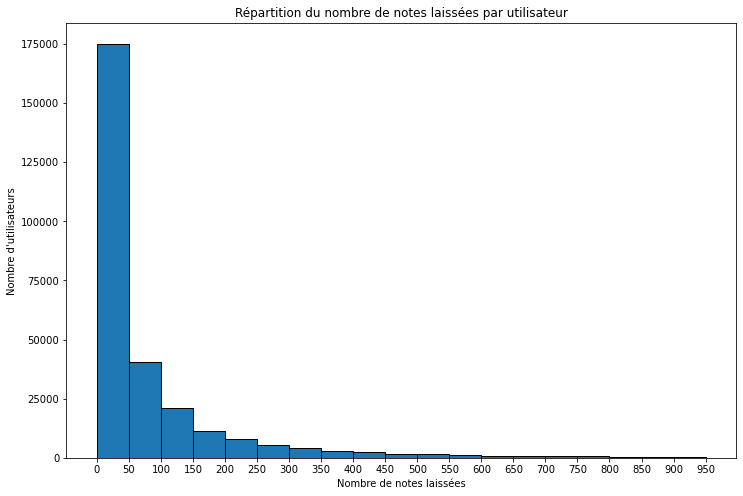

In [11]:
users_ratings_df = (
    ratings_df
    .groupby('userId', as_index=False)
    .agg({'rating': ['count']})
)

bins_gap = 50
range_to_show = list(range(0, 1000,bins_gap))
bins = pd.cut(users_ratings_df['rating', 'count'], bins=range_to_show).\
    value_counts().\
    to_frame()

serie = bins['rating', 'count'].to_numpy()
index = bins.index.map(lambda x: x.right).categories

plt.bar([x - (bins_gap / 2) for x in index], serie, bins_gap,
        edgecolor=(0,0,0))
plt.xticks(range_to_show)
plt.ylabel('Nombre d\'utilisateurs')
plt.xlabel('Nombre de notes laissées')
plt.title('Répartition du nombre de notes laissées par utilisateur')
plt.show()

## Ratings count by movie

How many ratings a movie receives ?

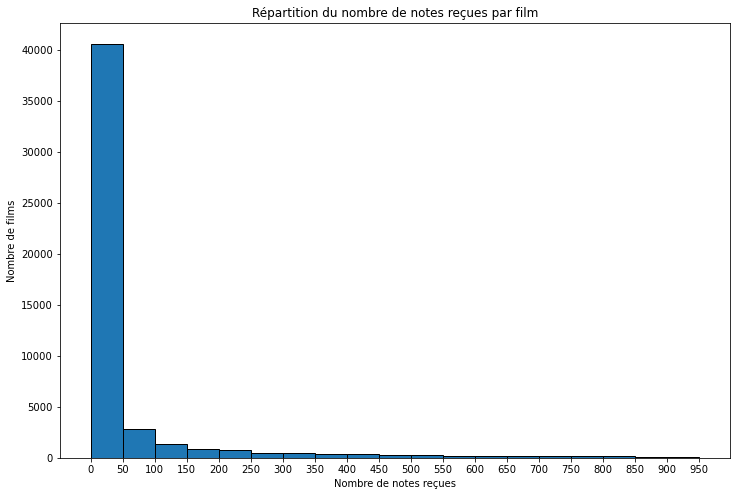

In [12]:
movies_ratings_df = (
    ratings_df
    .groupby('movieId', as_index=False)
    .agg({'rating': ['count']})
)

bins_gap = 50
range_to_show = list(range(0, 1000,bins_gap))
bins = pd.cut(movies_ratings_df['rating', 'count'], bins=range_to_show).\
    value_counts().\
    to_frame()

serie = bins['rating', 'count'].to_numpy()
index = bins.index.map(lambda x: x.right).categories

plt.bar([x - (bins_gap / 2) for x in index], serie, bins_gap,
        edgecolor=(0,0,0))
plt.xticks(range_to_show)
plt.ylabel('Nombre de films')
plt.xlabel('Nombre de notes reçues')
plt.title('Répartition du nombre de notes reçues par film')
plt.show()

In [20]:
ratings_gr_by_mid = ratings_df.groupby(by='movieId').size().to_frame('size')
ratings_gr_by_mid = ratings_gr_by_mid.sort_values('size', ascending=False)

print(ratings_gr_by_mid.describe(percentiles=[0.25,0.50,0.75,0.90, 0.99]).to_latex())

\begin{tabular}{lr}
\toprule
{} &          size \\
\midrule
count &  53889.000000 \\
mean  &    515.011301 \\
std   &   2934.758939 \\
min   &      1.000000 \\
25\%   &      2.000000 \\
50\%   &      7.000000 \\
75\%   &     48.000000 \\
90\%   &    531.000000 \\
99\%   &  12021.720000 \\
max   &  97999.000000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_5929/2427376339.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ratings_gr_by_mid.describe(percentiles=[0.25,0.50,0.75,0.90, 0.99]).to_latex())


## Correlation between number of tags and mean rating of movies

In [12]:
movies_mean_rating_df = ratings_df. \
    groupby(by='movieId', as_index=False). \
    mean(). \
    rename(columns={'rating': 'rating_mean'}). \
    drop(['userId', 'timestamp'], axis=1)  # Drop silly aggregated columns

tags_movies_count_df = tags_df.\
    groupby(by='movieId', as_index=False).\
    count().\
    rename(columns={'tag': 'tag_count'})[['movieId','tag_count']]

tags_movies_count_df.sample(10)

,movieId,tag_count
32937,148869,8
29570,137411,3
26410,127056,3
14600,78019,3
15042,80204,1
32777,148347,3
15518,82364,7
39923,171091,3
34815,155703,3
23506,117370,10


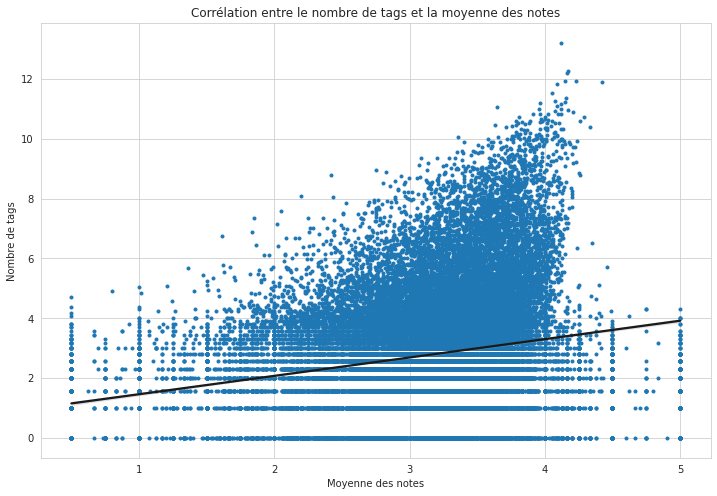

In [26]:
tags_movies_count_df = tags_movies_count_df.sort_values('tag_count', ascending=False)

tag_count_rating_mean = movies_mean_rating_df.merge(tags_movies_count_df, on='movieId', how='left')

# We must use logarithm, to take into account outliers
tag_count_rating_mean['tag_count'] = np.log2(tag_count_rating_mean['tag_count'])

plt.scatter(tag_count_rating_mean["rating_mean"], tag_count_rating_mean["tag_count"], marker=".")

# The plot and the linear regression is made easy with seaborn
# Cf. https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python
# for a 100% matplotlib/numpy solution
sns.regplot(x=tag_count_rating_mean["rating_mean"], y=tag_count_rating_mean["tag_count"], scatter=False, color=".1")
plt.ylabel('Nombre de tags')
plt.xlabel('Moyenne des notes')
plt.title('Corrélation entre le nombre de tags et la moyenne des notes')
plt.show()


In [29]:
tag_count_rating_mean.corr()
# print(tag_count_rating_mean.corr().to_latex())


,movieId,rating_mean,tag_count
movieId,1.000000,-0.091293,-0.444346
rating_mean,-0.091293,1.000000,0.210179
tag_count,-0.444346,0.210179,1.000000
